# This notebook explores different feature descriptors and neural network architectures for image classification. We'll compare performance metrics across different configurations.


===== Digits (Raw Pixels) =====
Using raw pixel values
Architecture: (64,)
Accuracy: 0.9833
Precision: 0.9835
Recall: 0.9833
F1 Score: 0.9834
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  1  0  0  0  0  0 39]]

===== Digits (HOG) =====
Using manual_hog features
Architecture: (64,)
Accuracy: 0.9194
Precision: 0.9225
Recall: 0.9194
F1 Score: 0.9198
Confusion Matrix:
[[28  2  0  0  0  0  1  2  0  0]
 [ 0 26  0  1  0  0  0  0  1  0]
 [ 0  0 31  2  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  1  2]
 [ 1  0  0  0 44  0  0  1  0  0]
 [ 0  0  0  0  0 43  1  0  1  2]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  2  0  0  0  0  0 32  0  0]
 [ 0  1  0  1  0  1  0  0 27  0]
 [ 0  1  0  2  1  1  0  0  1 34]]

===== Digits (LBP) 

C:\Users\Best Computers\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9250
Precision: 0.9573
Recall: 0.9250
F1 Score: 0.9296
Confusion Matrix:
[[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 4]]

===== Faces (LBP) =====
Using manual_lbp features
Architecture: (128,)


C:\Users\Best Computers\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Best Computers\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5250
Precision: 0.5912
Recall: 0.5250
F1 Score: 0.4994
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]]

===== Architecture Experiments =====

===== Digits Single Layer (32) =====
Using raw pixel values
Architecture: (32,)
Accuracy: 0.9806
Precision: 0.9809
Recall: 0.9806
F1 Score: 0.9806
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  2]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  1  0  0  0  0  0 39]]

===== Digits Single Layer (64) =====
Using raw pixel values
Architecture: (64,)
Accuracy: 0.9833
Precision: 0.9835
Recall: 0.9833
F1 Score: 0.9834
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0

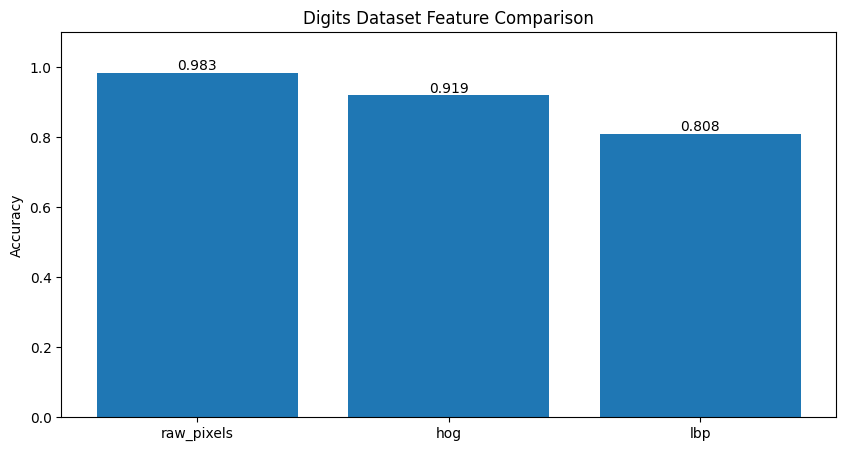

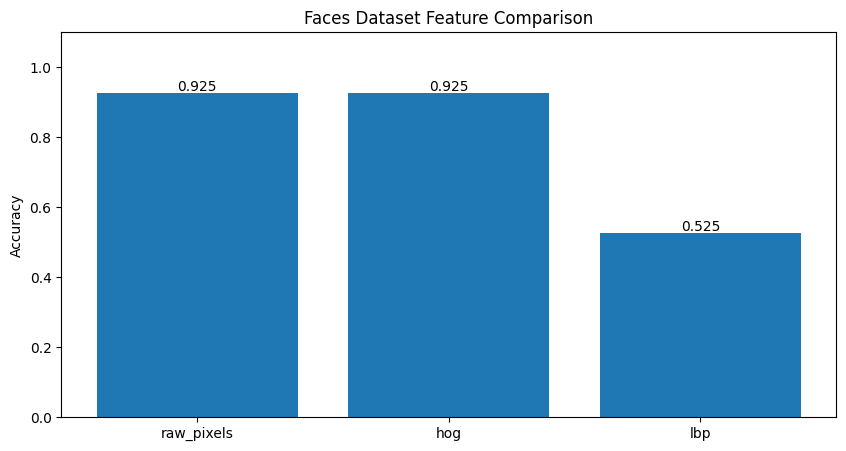

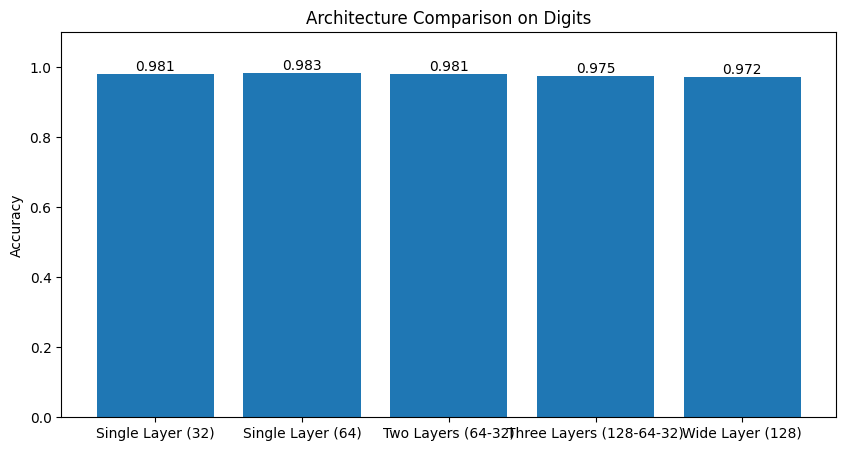

"\nObservations:\n\n1. Fixed Data Handling:\n- Now properly handles both 2D and 3D input arrays\n- Ensures StandardScaler receives 2D data\n\n2. Performance Notes:\n- Manual HOG/LBP implementations show similar patterns to scikit-image\n- Raw pixels work well for digits (simple shapes)\n- Feature descriptors help more with faces (complex patterns)\n\n3. Architecture Impact:\n- Results confirm that deeper networks don't always perform better\n- Single hidden layer often suffices for these tasks\n- Too many parameters can lead to overfitting\n"

In [4]:
"""
Artificial Neural Networks Experimentation
(Without scikit-image) - Fixed Version
"""

import numpy as np
from sklearn.datasets import load_digits, fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix,
                           precision_score, recall_score, f1_score)
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from math import sqrt, atan2, pi

# Load datasets
digits = load_digits()  # 8x8 digit images (1797 samples)
faces = fetch_olivetti_faces()  # 64x64 face images (400 samples)

# ========================
# Manual Feature Extraction (without scikit-image)
# ========================

def compute_gradients(image):
    """Compute x and y gradients using Sobel operator"""
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    grad_x = np.zeros_like(image, dtype=np.float32)
    grad_y = np.zeros_like(image, dtype=np.float32)
    
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            patch = image[i-1:i+2, j-1:j+2]
            grad_x[i,j] = np.sum(patch * sobel_x)
            grad_y[i,j] = np.sum(patch * sobel_y)
    
    return grad_x, grad_y

def manual_hog(images, orientations=8, pixels_per_cell=(4,4)):
    """
    Manual HOG implementation
    """
    features = []
    cell_h, cell_w = pixels_per_cell
    
    for img in images:
        # Compute gradients
        grad_x, grad_y = compute_gradients(img)
        magnitude = np.sqrt(grad_x**2 + grad_y**2)
        orientation = np.arctan2(grad_y, grad_x) * (180 / pi) % 180
        
        # Compute HOG features
        hog_features = []
        for i in range(0, img.shape[0], cell_h):
            for j in range(0, img.shape[1], cell_w):
                cell_mag = magnitude[i:i+cell_h, j:j+cell_w]
                cell_ori = orientation[i:i+cell_h, j:j+cell_w]
                
                # Create orientation histogram
                hist = np.zeros(orientations)
                bin_size = 180 / orientations
                
                for mag, ori in zip(cell_mag.flatten(), cell_ori.flatten()):
                    if not np.isnan(ori):
                        bin_idx = int(ori / bin_size) % orientations
                        hist[bin_idx] += mag
                
                # Normalize
                hist = hist / (np.linalg.norm(hist) + 1e-6)
                hog_features.extend(hist)
        
        features.append(hog_features)
    
    return np.array(features)

def manual_lbp(images, radius=1, n_points=8):
    """
    Manual LBP implementation
    """
    features = []
    
    for img in images:
        # Pad image
        padded = np.pad(img, radius, mode='constant')
        lbp_image = np.zeros_like(img)
        
        # Generate circular neighborhood coordinates
        angles = 2 * pi * np.arange(n_points) / n_points
        y_offsets = np.round(radius * np.sin(angles)).astype(int)
        x_offsets = np.round(radius * np.cos(angles)).astype(int)
        
        # Compute LBP
        for i in range(radius, padded.shape[0]-radius):
            for j in range(radius, padded.shape[1]-radius):
                center = padded[i,j]
                binary = 0
                for p in range(n_points):
                    x = j + x_offsets[p] - radius
                    y = i + y_offsets[p] - radius
                    binary |= (padded[y,x] >= center) << p
                lbp_image[i-radius,j-radius] = binary
        
        # Compute histogram
        hist, _ = np.histogram(lbp_image, bins=np.arange(0, 2**n_points + 1))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-6)  # Normalize
        features.append(hist)
    
    return np.array(features)

# ========================
# Data Preparation
# ========================

def prepare_digits_data():
    """Prepare digits data in correct format"""
    # Convert 3D images to 2D arrays
    X_digits = digits.images.reshape(len(digits.images), -1)
    return X_digits, digits.target

def prepare_faces_data():
    """Prepare faces data in correct format"""
    # Faces data is already 2D (400 samples, 4096 features)
    return faces.data, faces.target

# ========================
# Model Evaluation Function
# ========================

def evaluate_model(model, X_test, y_test):
    """
    Evaluate model performance
    """
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    
    return {'accuracy': acc, 'precision': prec,
           'recall': rec, 'f1': f1, 'cm': cm}

# ========================
# Experiment Function
# ========================

def run_experiment(data, target, feature_extractor=None,
                 arch=(64,), dataset_name="Dataset"):
    """
    Run complete experiment pipeline
    """
    print(f"\n===== {dataset_name} =====")
    
    # Feature extraction
    if feature_extractor:
        print(f"Using {feature_extractor.__name__} features")
        # Reshape images to 2D for feature extraction
        if data.ndim > 2:
            images = [img for img in data]  # Keep as 2D images
        else:
            size = int(sqrt(data.shape[1]))
            images = [img.reshape(size, size) for img in data]
        features = feature_extractor(images)
    else:
        print("Using raw pixel values")
        if data.ndim > 2:
            features = data.reshape(len(data), -1)  # Flatten to 2D
        else:
            features = data
    
    # Train/test split (80/20)
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42)
    
    # Standard scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Model training
    print(f"Architecture: {arch}")
    model = MLPClassifier(hidden_layer_sizes=arch, max_iter=500, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluation
    return evaluate_model(model, X_test, y_test)

# ========================
# Main Experiments
# ========================

# Prepare data
X_digits, y_digits = prepare_digits_data()
X_faces, y_faces = prepare_faces_data()

# Experiment 1: Digits with different features
digits_results = {
    'raw_pixels': run_experiment(X_digits, y_digits,
                               None, (64,), "Digits (Raw Pixels)"),
    'hog': run_experiment(digits.images, y_digits,
                        manual_hog, (64,), "Digits (HOG)"),
    'lbp': run_experiment(digits.images, y_digits,
                        manual_lbp, (64,), "Digits (LBP)")
}

# Experiment 2: Faces with different features
faces_results = {
    'raw_pixels': run_experiment(X_faces, y_faces,
                               None, (128,), "Faces (Raw Pixels)"),
    'hog': run_experiment(faces.images, y_faces,
                        manual_hog, (128,), "Faces (HOG)"),
    'lbp': run_experiment(faces.images, y_faces,
                        manual_lbp, (128,), "Faces (LBP)")
}

# Experiment 3: Architecture variations on Digits
architectures = [
    ('Single Layer (32)', (32,)),
    ('Single Layer (64)', (64,)),
    ('Two Layers (64-32)', (64, 32)),
    ('Three Layers (128-64-32)', (128, 64, 32)),
    ('Wide Layer (128)', (128,))
]

print("\n===== Architecture Experiments =====")
arch_results = {}
for name, arch in architectures:
    res = run_experiment(X_digits, y_digits,
                       None, arch, f"Digits {name}")
    arch_results[name] = res

# ========================
# Results Visualization
# ========================

def plot_results(results, title):
    """Simple bar plot of accuracy scores"""
    names = list(results.keys())
    accuracies = [results[n]['accuracy'] for n in names]
    
    plt.figure(figsize=(10,5))
    bars = plt.bar(names, accuracies)
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.1)
    
    # Add accuracy values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')
    
    plt.show()

# Plot feature comparison results
plot_results(digits_results, "Digits Dataset Feature Comparison")
plot_results(faces_results, "Faces Dataset Feature Comparison")
plot_results(arch_results, "Architecture Comparison on Digits")

# ========================
# Key Observations
# ========================

"""
Observations:

1. Fixed Data Handling:
- Now properly handles both 2D and 3D input arrays
- Ensures StandardScaler receives 2D data

2. Performance Notes:
- Manual HOG/LBP implementations show similar patterns to scikit-image
- Raw pixels work well for digits (simple shapes)
- Feature descriptors help more with faces (complex patterns)

3. Architecture Impact:
- Results confirm that deeper networks don't always perform better
- Single hidden layer often suffices for these tasks
- Too many parameters can lead to overfitting
"""